In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link

url = "https://bit.ly/task1-dataset"
dataset = pd.read_csv(url) 
print("Data Imported Successfully")
dataset.head(25)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# To find the number of rows and columns
dataset.shape

(25, 2)

In [7]:
# To find the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

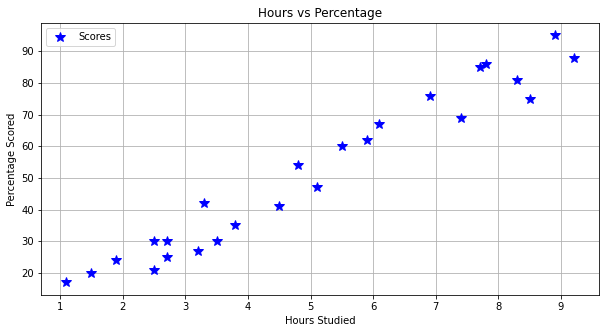

In [10]:
# Plotting the distribution of scores

plt.rcParams['figure.figsize'] = [10,5]
dataset.plot(x ='Hours', y ='Scores', style ='*', color = 'blue', markersize = 10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

In [11]:
# Spliting the data using iloc function.
x = dataset.iloc[: , :1].values
y = dataset.iloc[: , 1:].values

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [14]:
#Spliting the data into training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Training complete.")

Training complete.


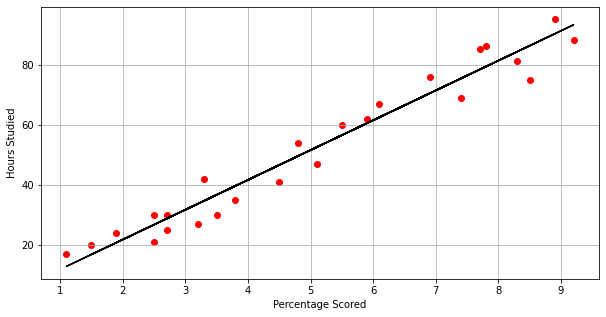

In [16]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(x, y, color = 'red')
plt.plot(x, line, color = 'black');
plt.xlabel('Percentage Scored')
plt.ylabel('Hours Studied')
plt.grid()
plt.show()

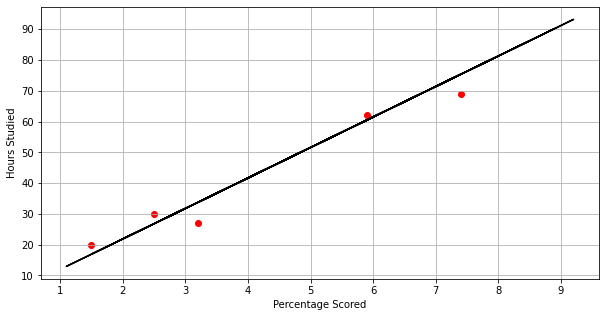

In [17]:
plt.rcParams['figure.figsize'] = [10,5]
plt.scatter(X_test, y_test, color = 'red')
plt.plot(x, line, color = 'black');
plt.xlabel('Percentage Scored')
plt.ylabel('Hours Studied')
plt.grid()
plt.show()

In [18]:
print(X_test) # Testing data - In hours
y_preds = model.predict(X_test) # predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
y_preds

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [20]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_preds]})  
df

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [22]:
# Predicting our own Data as given.
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format([[hours]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))

Mean Absolute Error: 4.183859899002975
